<a href="https://colab.research.google.com/github/ApoloXO/OR/blob/main/ciw_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python CIW Tutorial
Carlos Alexander Grajales Correa \\
Professor Universidad de Antioquia, Colombia \\
alexander.grajales@udea.edu.co \\
**Reference:** *https://ciw.readthedocs.io/en/latest/#*

\\


☝ Before start

At Google Colab, for this course, you will first need to install

* ciw
___

In [ ]:
!pip install ciw
import ciw

# CIW Tutorial I: Defining & Running a Simulation

Assume you are a bank manager and would like to know how long customers wait in your bank. Customers arrive randomly, roughly 12 per hour, regardless of the time of day. Service time is random, but on average lasts roughly 10 minutes. The bank is open 24 hours a day, 7 days a week, and has three servers who are always on duty. If all servers are busy, newly arriving customers form a queue and wait for service. On average how long do customers wait?
___

☝ Creation of Network and Simulation Object:

In [ ]:
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(rate=0.2)], # la linea me indica: distr de llegada
    service_distributions=[ciw.dists.Exponential(rate=0.1)],
    number_of_servers=[3]
)
ciw.seed(1)
Q = ciw.Simulation(N)
Q.simulate_until_max_time(1440)


# Ciw Tutorial II: Exploring the Simulation Object

☝ Q Nodes:

In [ ]:
print(Q.nodes)
print(Q.nodes[0])
print(Q.nodes[1])
print(Q.nodes[-1])

[Arrival Node, Node 1, Exit Node]
Arrival Node
Node 1
Exit Node


☝ Q Node 0:

In [ ]:
Q.nodes[0].number_of_individuals

307

☝ Q Node -1:

In [ ]:
print(len(Q.nodes[-1].all_individuals))
print(Q.nodes[-1].all_individuals[0])
print(Q.nodes[-1].all_individuals[-1])
# Q.nodes[-1].all_individuals

304
Individual 2
Individual 300


☝ Q Node 1:

In [ ]:
print(Q.nodes[1].all_individuals, '\n')

[Individual 304, Individual 306, Individual 307] 



☝ Q Node -1, First Individual:

In [ ]:
ind = Q.nodes[-1].all_individuals[0]

print(ind)
print(len(ind.data_records))
print(ind.data_records)
print(ind.data_records[0].arrival_date)

Individual 2
1
[Record(id_number=2, customer_class='Customer', original_customer_class='Customer', node=1, arrival_date=7.93629994728086, waiting_time=0.0, service_start_date=7.93629994728086, service_time=2.944637168942629, service_end_date=10.880937116223489, time_blocked=0.0, exit_date=10.880937116223489, destination=-1, queue_size_at_arrival=1, queue_size_at_departure=1, server_id=2, record_type='service')]
7.93629994728086


# CIW Tutorial III: Collecting Results

☝ Q Get Records

In [ ]:
recs = Q.get_all_records()

# A list of service times
servicetimes = [r.service_time for r in recs]

# A list of waits
waits = [r.waiting_time for r in recs]

mean_service_time = sum(servicetimes) / len(servicetimes)
print('Mean service time: ', mean_service_time)

mean_waiting_time = sum(waits) / len(waits)
print('Mean waiting time', mean_waiting_time)


Mean service time:  10.647482395960761
Mean waiting time 4.230543089827278


☝ Histogram of Waiting Time

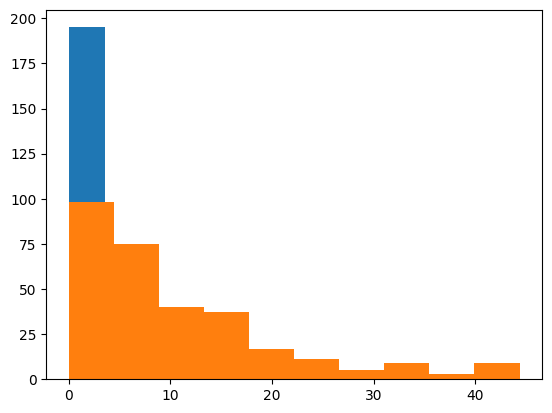

In [ ]:
import matplotlib.pyplot as plt
plt.hist(waits);
plt.hist(servicetimes);

In [ ]:
x=Q.transitive_nodes[0].server_utilisation
print(x)

y=Q.nodes[1].server_utilisation
print(y)


0.7528800233231026
0.7528800233231026


# CIW Tutorial IV: Trials, Warm-up & Cool-down

☝ Run 10 Simulations representing 10 days and use Warm-Up and Cool-Down conditions of 100 Minutes

In [ ]:
average_waits = []
for trial in range(10):
    ciw.seed(trial)
    Q = ciw.Simulation(N)
    Q.simulate_until_max_time(1640)
    recs = Q.get_all_records()
    waits = [r.waiting_time for r in recs if r.arrival_date > 100 and r.arrival_date < 1540]
    mean_wait = sum(waits) / len(waits)
    average_waits.append(mean_wait)

print(average_waits)
expect_average_waits = sum(average_waits) / len(average_waits)
print('Average waiting time in 10 days: ', expect_average_waits)

[3.9195067790072535, 4.341639113115432, 4.617798011606141, 5.335376255690059, 5.062248080008144, 2.902745448034656, 4.932099220209271, 17.95093128538666, 4.061367618078301, 3.141264357163561]
Average waiting time in 10 days:  5.626497616829948


 ☝ Adding One Extra Server

In [ ]:
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(rate=0.2)],
    service_distributions=[ciw.dists.Exponential(rate=0.1)],
    number_of_servers=[4]
)

average_waits = []
for trial in range(10):
    ciw.seed(trial)
    Q = ciw.Simulation(N)
    Q.simulate_until_max_time(1640)
    recs = Q.get_all_records()
    waits = [r.waiting_time for r in recs if r.arrival_date > 100 and r.arrival_date < 1540]
    mean_wait = sum(waits) / len(waits)
    average_waits.append(mean_wait)

expect_average_waits_extra_server = sum(average_waits) / len(average_waits)

print('Average waiting time in 10 days with extra server: ', expect_average_waits_extra_server)

Average waiting time in 10 days with extra server:  0.7986862233165134


# CIW Tutorial V: A Network of Queues¶

In this system there are three nodes: Cold food counter (Node 1), Hot food counter (Node 2), and the till (Node 3):

* Customers wanting hot food only arrive at a rate of 12 per hour.
* Customers wanting cold food arrive at a rate of 18 per hour.
* 30% of all customer who buy cold food also want to buy hot food.
* On average it takes 1 minute to be served cold food, 2 and a half minutes to be served hot food, and 2 minutes to pay.
* There is 1 server at the cold food counter, 2 servers at the hot food counter, and 2 servers at the till.

Find the average number of customers that pass through the system in a three hour lunchtime.

☝ Creation of Network and Simulation Object:

In [ ]:
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(rate=0.3),
                           ciw.dists.Exponential(rate=0.2),
                           None],
    service_distributions=[ciw.dists.Exponential(rate=1.0),
                           ciw.dists.Exponential(rate=0.4),
                           ciw.dists.Exponential(rate=0.5)],
    routing=[[0.0, 0.3, 0.7],
             [0.0, 0.0, 1.0],
             [0.0, 0.0, 0.0]],
    number_of_servers=[1, 2, 2]
)

☝ Run 100 Simulations representing three hours lunchtime periods and use Cool-Down conditions of 20 Minutes

In [ ]:
completed_custs = []
for trial in range(100):
    ciw.seed(trial)
    Q = ciw.Simulation(N)
    Q.simulate_until_max_time(200)
    recs = Q.get_all_records()
    num_completed = len([r for r in recs if r.node==3 and r.arrival_date < 180])
    completed_custs.append(num_completed)

expect_average_customers_luchtime = sum(completed_custs) / len(completed_custs)

print('Average Customers Luchtime: ', expect_average_customers_luchtime)

Average Customers Luchtime:  89.13
